In [1]:
# importing modules
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# opening files
file = "files\\bpl.csv"

In [3]:
# creating dataframe
df = pd.read_csv(file)

In [4]:
df.head()

,id,season,match_no,date,team_1,team_1_score,team_2,team_2_score,player_of_match,toss_winner,toss_decision,winner,venue,city,win_by_wickets,win_by_runs,result,umpire_1,umpire_2
0,0,2011/12,Final,Feb 29 2012,Barisal Burners,140/7,Dhaka Gladiators,144/2,Imran Nazir,Dhaka Gladiators,field first,Dhaka,"Shere Bangla National Stadium, Mirpur",Mirpur,8,0,8 wickets,David Orchard,Enamul Haque
1,30,2011/12,3rd,Feb 11 2012,Khulna Royal Bengals,175/5,Dhaka Gladiators,156/7,Andre Russell,Khulna Royal Bengals,bat first,Khulna,"Shere Bangla National Stadium, Mirpur",Mirpur,0,19,19 runs,Jeremy Lloyds,Sharfuddoula
2,26,2011/12,7th,Feb 13 2012,Barisal Burners,125,Khulna Royal Bengals,131/3,Dwayne Smith,Khulna Royal Bengals,field first,Khulna,"Shere Bangla National Stadium, Mirpur",Mirpur,7,0,7 wickets,Enamul Haque,Jeremy Lloyds
3,29,2011/12,4th,Feb 11 2012,Barisal Burners,180/2,Duronto Rajshahi,158/9,Ahmed Shehzad,Barisal Burners,bat first,Barisal,"Shere Bangla National Stadium, Mirpur",Mirpur,0,22,22 runs,David Orchard,Gazi Sohel
4,28,2011/12,5th,Feb 12 2012,Khulna Royal Bengals,171/3,Chittagong Kings,174/4,Nasir Jamshed,Khulna Royal Bengals,bat first,Chittagong,"Shere Bangla National Stadium, Mirpur",Mirpur,6,0,6 wickets,David Orchard,Enamul Haque


In [5]:
# Filter the data for the seasons 2011/12 and 2016/17
filtered_data = df[df['season'].isin(['2011/12', '2016/17'])]

# Selecting relevant columns for the analysis
filtered_data = filtered_data[['season', 'toss_winner', 'toss_decision', 'winner', 'venue']]

# Displaying the filtered data to ensure it's correct
filtered_data.head()

,season,toss_winner,toss_decision,winner,venue
0,2011/12,Dhaka Gladiators,field first,Dhaka,"Shere Bangla National Stadium, Mirpur"
1,2011/12,Khulna Royal Bengals,bat first,Khulna,"Shere Bangla National Stadium, Mirpur"
2,2011/12,Khulna Royal Bengals,field first,Khulna,"Shere Bangla National Stadium, Mirpur"
3,2011/12,Barisal Burners,bat first,Barisal,"Shere Bangla National Stadium, Mirpur"
4,2011/12,Khulna Royal Bengals,bat first,Chittagong,"Shere Bangla National Stadium, Mirpur"


In [6]:
# organizing data
filtered_data["toss_winner"] = filtered_data["toss_winner"].apply(lambda team: team.split()[0])

In [7]:
filtered_data.head()

,season,toss_winner,toss_decision,winner,venue
0,2011/12,Dhaka,field first,Dhaka,"Shere Bangla National Stadium, Mirpur"
1,2011/12,Khulna,bat first,Khulna,"Shere Bangla National Stadium, Mirpur"
2,2011/12,Khulna,field first,Khulna,"Shere Bangla National Stadium, Mirpur"
3,2011/12,Barisal,bat first,Barisal,"Shere Bangla National Stadium, Mirpur"
4,2011/12,Khulna,bat first,Chittagong,"Shere Bangla National Stadium, Mirpur"


In [8]:
# Create a new column to check if the toss winner also won the match
filtered_data['toss_winner_won'] = filtered_data['toss_winner'] == filtered_data['winner']
filtered_data.head()

,season,toss_winner,toss_decision,winner,venue,toss_winner_won
0,2011/12,Dhaka,field first,Dhaka,"Shere Bangla National Stadium, Mirpur",True
1,2011/12,Khulna,bat first,Khulna,"Shere Bangla National Stadium, Mirpur",True
2,2011/12,Khulna,field first,Khulna,"Shere Bangla National Stadium, Mirpur",True
3,2011/12,Barisal,bat first,Barisal,"Shere Bangla National Stadium, Mirpur",True
4,2011/12,Khulna,bat first,Chittagong,"Shere Bangla National Stadium, Mirpur",False


In [11]:
filtered_data["toss_decision"].value_counts()

field first    42
bat first      36
Name: toss_decision, dtype: int64

In [16]:
# Create a bar plot to compare toss decisions based on the venue
toss_decision_venue = filtered_data.groupby(['venue', 'toss_decision']).size().unstack()
toss_decision_venue

toss_decision,bat first,field first
venue,,
"Shere Bangla National Stadium, Mirpur",26,33
"Zahur Ahmed Chowdhury Stadium, Chittagong",10,9


In [17]:
# Add toss_winner_won information
toss_winner_venue = filtered_data.groupby(['venue', 'toss_decision'])['toss_winner_won'].mean().unstack().fillna(0)
toss_winner_venue

toss_decision,bat first,field first
venue,,
"Shere Bangla National Stadium, Mirpur",0.153846,0.212121
"Zahur Ahmed Chowdhury Stadium, Chittagong",0.000000,0.111111


In [18]:
# Combine both DataFrames
combined_df = toss_decision_venue.join(toss_winner_venue, lsuffix='_count', rsuffix='_win_ratio')
combined_df

toss_decision,bat first_count,field first_count,bat first_win_ratio,field first_win_ratio
venue,,,,
"Shere Bangla National Stadium, Mirpur",26,33,0.153846,0.212121
"Zahur Ahmed Chowdhury Stadium, Chittagong",10,9,0.000000,0.111111


In [19]:
# Reset index for plotting
combined_df = combined_df.reset_index()
combined_df

toss_decision,venue,bat first_count,field first_count,bat first_win_ratio,field first_win_ratio
0,"Shere Bangla National Stadium, Mirpur",26,33,0.153846,0.212121
1,"Zahur Ahmed Chowdhury Stadium, Chittagong",10,9,0.000000,0.111111


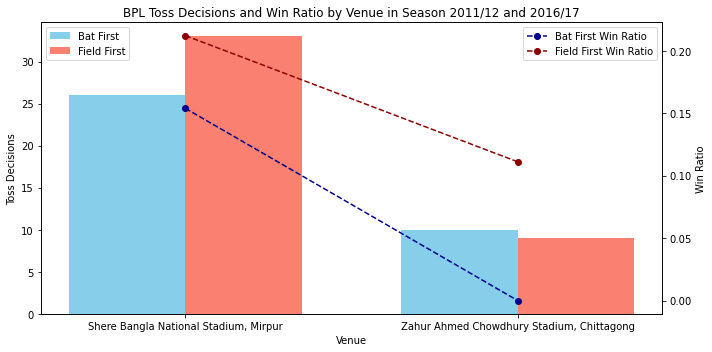

In [35]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar plot for counts of toss decisions
width = 0.35  # width of the bars
x = range(len(combined_df))  # x locations for the groups
ax1.bar([i - width/2 for i in x], combined_df['bat first_count'], width, label='Bat First', color='skyblue')
ax1.bar([i + width/2 for i in x], combined_df['field first_count'], width, label='Field First', color='salmon')
ax1.set_ylabel('Toss Decisions')
ax1.set_xlabel('Venue')
ax1.set_title('BPL Toss Decisions and Win Ratio by Venue in Season 2011/12 and 2016/17')
ax1.set_xticks(x)
ax1.set_xticklabels(combined_df['venue'])
ax1.legend(loc='upper left')

# Twin axis to plot toss winner win ratio
ax2 = ax1.twinx()
ax2.plot(combined_df['venue'], combined_df['bat first_win_ratio'], marker='o', linestyle='--', color='darkblue', label='Bat First Win Ratio')
ax2.plot(combined_df['venue'], combined_df['field first_win_ratio'], marker='o', linestyle='--', color='darkred', label='Field First Win Ratio')
ax2.set_ylabel('Win Ratio')
ax2.legend(loc='upper right')

# adjust layout and show plot
fig.tight_layout()
plt.show()